In [84]:
import pandas as pd
import numpy as np


In [85]:
import nltk
import re
import string
#nltk. download('stopwords')
from nltk. corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk. SnowballStemmer("english")

In [86]:
dataset = pd.read_csv("C:\\Users\\DELL\\Downloads\\labeled_data.csv")

In [87]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [88]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [90]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [91]:
dataset["labels"] =dataset["class"].map({0: "Hate_Speech",
                                         1:"Offensive_Language",
                                         2:"No Hate or Offensive_Language"})

In [92]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate or Offensive_Language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive_Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive_Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive_Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive_Language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive_Language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No Hate or Offensive_Language
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive_Language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive_Language


In [93]:
data=dataset[{"tweet", "labels"}]

C:\Users\DELL\AppData\Local\Temp\ipykernel_13268\2897999216.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data=dataset[{"tweet", "labels"}]


In [94]:
data

,labels,tweet
0,No Hate or Offensive_Language,!!! RT @mayasolovely: As a woman you shouldn't...
1,Offensive_Language,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,Offensive_Language,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,Offensive_Language,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,Offensive_Language,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,Offensive_Language,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,No Hate or Offensive_Language,"you've gone and broke the wrong heart baby, an..."
24780,Offensive_Language,young buck wanna eat!!.. dat nigguh like I ain...
24781,Offensive_Language,youu got wild bitches tellin you lies


In [95]:
def clean (text):
 text = str (text). lower()
 text = re. sub('[.?]', '', text) 
 text = re. sub('https?://\S+|www.\S+', '', text)
 text = re. sub('<.?>+', '', text)
 text = re. sub('[%s]' % re. escape(string. punctuation), '', text)
 text = re. sub('\n', '', text)
 text = re. sub('\w\d\w', '', text)
 text = [word for word in text.split(' ') if word not in stopword]
 text=" ". join(text)
 text = [stemmer. stem(word) for word in text. split(' ')]
 text=" ". join(text)
 return text





In [96]:
data["tweet"] = data["tweet"]. apply(clean)


C:\Users\DELL\AppData\Local\Temp\ipykernel_13268\3803124611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"]. apply(clean)


In [97]:
data

,labels,tweet
0,No Hate or Offensive_Language,rt mayasolov woman shouldnt complain clean ho...
1,Offensive_Language,rt mlee boy dat coldtyga dwn bad cuffin dat h...
2,Offensive_Language,rt urkindofbrand dawg rt babif ever fuck bitc...
3,Offensive_Language,rt cganderson vivabas look like tranni
4,Offensive_Language,rt shenikarobert shit hear might true might f...
...,...,...
24778,Offensive_Language,yous muthafin lie 0lifeask earl coreyemanuel r...
24779,No Hate or Offensive_Language,youv gone broke wrong heart babi drove redneck...
24780,Offensive_Language,young buck wanna eat dat nigguh like aint fuck...
24781,Offensive_Language,youu got wild bitch tellin lie


In [98]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

In [99]:
x

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt mlee boy dat coldtyga dwn bad cuffin dat hoe 1st place',
       ' rt urkindofbrand dawg rt babif ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [100]:
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split

In [101]:
cv = CountVectorizer()
X = cv. fit_transform(x)

In [102]:
X



<24783x31392 sparse matrix of type '<class 'numpy.int64'>'
	with 207551 stored elements in Compressed Sparse Row format>

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [104]:
X_train

<16604x31392 sparse matrix of type '<class 'numpy.int64'>'
	with 139156 stored elements in Compressed Sparse Row format>

In [116]:

from sklearn. tree import DecisionTreeClassifier

In [117]:
model = DecisionTreeClassifier()
model. fit(X_train,y_train)

DecisionTreeClassifier()

In [118]:
y_pred = model. predict (X_test)

In [120]:
from sklearn.metrics import confusion_matrix

# Assuming you have already defined y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
cm


array([[ 149,   51,  265],
       [  37, 1185,  157],
       [ 246,  253, 5836]], dtype=int64)

In [121]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

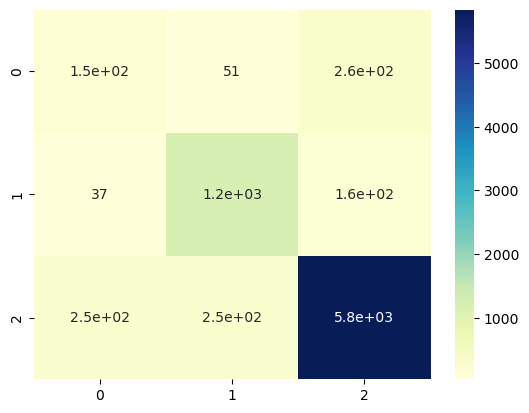

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.show()

In [126]:
from sklearn. metrics import accuracy_score
accuracy_score (y_test,y_pred)

0.8766352854872234

In [128]:
sample="let's unit and kill the people who are the protesting against the goverment"
sample=clean(sample)

In [129]:
sample

'let unit kill peopl protest gover'

In [151]:
sample= cv. transform([sample]). toarray()
print(model. predict(sample))

['No Hate or Offensive_Language']
